In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#externo = pd.read_csv('./externo.csv')
interno = pd.read_csv('./interno.csv')

In [4]:

interno['SEMENTE'] = interno['SEMENTE'].str.replace(".jpg", "")

/tmp/ipykernel_39993/924147986.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  interno['SEMENTE'] = interno['SEMENTE'].str.replace(".jpg", "")


In [5]:
#externo['SEMENTE'] = externo['SEMENTE'].str.replace(".jpg", "")

In [6]:
interno['SEMENTE'] = interno['SEMENTE'].astype(int)
#externo['SEMENTE'] = externo['SEMENTE'].astype(int)

In [7]:
dados = pd.read_csv('./dados.csv')

In [8]:
dados.rename(columns={"REPETIÇÃO":"REPETICAO"}, inplace=True)

In [9]:
interno

,LOTE,REPETICAO,SEMENTE,0,1,2,3,4,5,6,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,2,2,32,0.301961,0.254902,0.349020,0.309804,0.274510,0.321569,0.274510,...,0.427451,0.270588,0.223529,0.403922,0.282353,0.227451,0.356863,0.247059,0.196078,0.286275
1,2,2,13,0.407843,0.341176,0.403922,0.415686,0.349020,0.411765,0.364706,...,0.364706,0.356863,0.325490,0.356863,0.364706,0.325490,0.360784,0.356863,0.317647,0.372549
2,2,2,37,0.337255,0.278431,0.419608,0.337255,0.286275,0.501961,0.301961,...,0.341176,0.352941,0.305882,0.380392,0.337255,0.282353,0.341176,0.392157,0.341176,0.372549
3,2,2,35,0.345098,0.298039,0.337255,0.329412,0.290196,0.345098,0.325490,...,0.439216,0.325490,0.294118,0.443137,0.325490,0.294118,0.423529,0.301961,0.266667,0.356863
4,2,2,47,0.313725,0.282353,0.372549,0.298039,0.270588,0.486275,0.282353,...,0.337255,0.313725,0.266667,0.333333,0.317647,0.266667,0.337255,0.317647,0.266667,0.407843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,2,15,0.274510,0.223529,0.262745,0.290196,0.243137,0.298039,0.309804,...,0.654902,0.278431,0.254902,0.615686,0.309804,0.274510,0.529412,0.321569,0.278431,0.396078
446,1,2,21,0.345098,0.301961,0.325490,0.372549,0.301961,0.349020,0.372549,...,0.341176,0.360784,0.317647,0.364706,0.411765,0.372549,0.419608,0.415686,0.384314,0.427451
447,1,2,29,0.396078,0.337255,0.407843,0.301961,0.254902,0.317647,0.301961,...,0.450980,0.341176,0.301961,0.337255,0.274510,0.227451,0.305882,0.294118,0.247059,0.403922
448,1,2,12,0.372549,0.298039,0.372549,0.325490,0.274510,0.333333,0.325490,...,0.431373,0.345098,0.286275,0.435294,0.341176,0.282353,0.392157,0.333333,0.274510,0.341176


In [10]:
df_test = dados.merge(interno, how="right")

<AxesSubplot: >

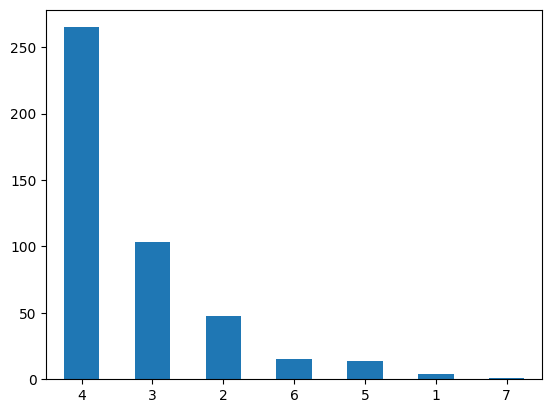

In [11]:
df_test['CLASSE'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

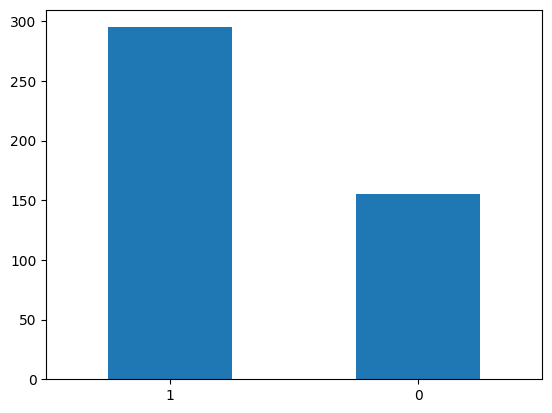

In [12]:
df_test['VIGOR'].value_counts().plot.bar(rot=0)

In [13]:
df_test.drop(['LOTE', 'REPETICAO', 'SEMENTE'], inplace=True, axis=1)

In [14]:
df_test.dropna(inplace=True)

In [15]:
df_test.to_csv('df_interno.csv', index_label=False)

KeyboardInterrupt: 

In [16]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score

In [17]:
classe = df_test['CLASSE']
vigor = df_test['VIGOR']

In [18]:
vigor = df_test['VIGOR']

In [19]:
df_test.drop(['CLASSE', 'VIGOR'], inplace=True, axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_test, vigor, test_size=0.33)

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [23]:
clf.score(X_test, y_test)

0.6845637583892618

In [24]:
from classificadores import *

In [ ]:
gradienteBooClassificator(df_test, classe, 5)

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
pred=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.34      0.23      0.28        47
           1       0.69      0.79      0.74       102

    accuracy                           0.62       149
   macro avg       0.52      0.51      0.51       149
weighted avg       0.58      0.62      0.59       149



--Classificator--
The classificator is: SVM
0.5937 accuracy with a standard deviation of 0.0078
0.1030 precision with a standard deviation of 0.0089
0.1733 recall with a standard deviation of 0.0133
0.1292 F1 with a standard deviation of 0.0107
-----------------------------------------------------------
SVM, Hold out, Acc =  0.5777777777777777
-----------------------------------------------------------


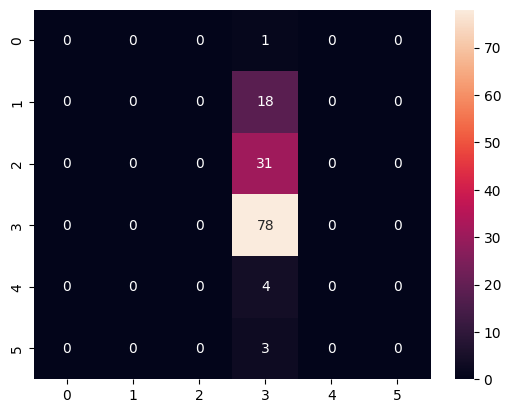

In [24]:
svmclassificator(df_test, classe, 5)

--Classificator--
The classificator is: GNB
0.3644 accuracy with a standard deviation of 0.1218
0.1985 precision with a standard deviation of 0.0747
0.2098 recall with a standard deviation of 0.1019
0.1764 F1 with a standard deviation of 0.0654
-----------------------------------------------------------
Gaussian Naive Bayes, Hold out, Acc =  0.4148148148148148
-----------------------------------------------------------


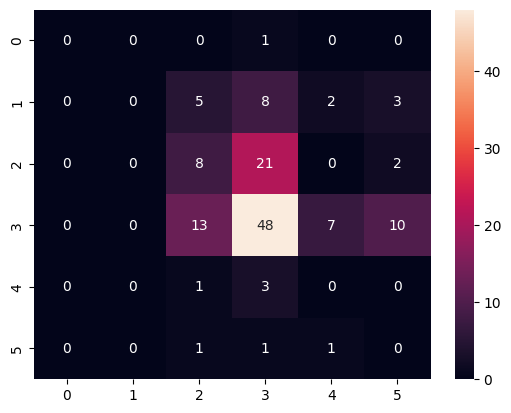

In [22]:
naivesBayesClassificator(df_test, classe, 10)

--Classificator--
The classificator is: RF
0.5222 accuracy with a standard deviation of 0.1185
0.1614 precision with a standard deviation of 0.0956
0.1777 recall with a standard deviation of 0.0459
0.1466 F1 with a standard deviation of 0.0454
-----------------------------------------------------------
Random Forest, Hold out, Acc =  0.5851851851851851
-----------------------------------------------------------


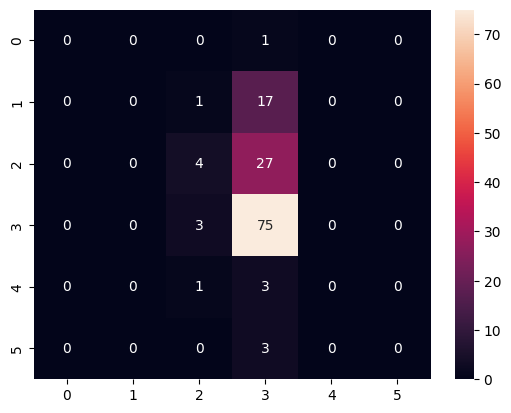

In [27]:
ramdomForestClassificator(df_test, classe, 10)

In [26]:
mlpclassificator(df_test, classe, 5)

--Classificator--
The classificator is: MLP
0.2889 accuracy with a standard deviation of 0.2589
0.0521 precision with a standard deviation of 0.0482
0.1733 recall with a standard deviation of 0.0133
0.0691 F1 with a standard deviation of 0.0590
-----------------------------------------------------------
Saída da rede:	 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Saída desejada:	 445    4
360    4
159    3
90     4
47     4
      ..
124    2
174    6
361    4
14     4
354    4
Name: CLASSE, Length: 180, dtype: int64
-----------------------------------------------------------
Score:  0.2222222222222222
MLP, hold out:  0.2222222222222222


--Classificator--
The classificator is: DT
0.3956 accuracy with a standard deviation of 0.0595
0.1594 precision with a standard deviation of 0.0206
0.1658 recall with a standard deviation of 0.0169
0.1542 F1 with a standard deviation of 0.0331
-----------------------------------------------------------
Decision Tree, Hold out, Acc =  0.3925925925925926
-----------------------------------------------------------


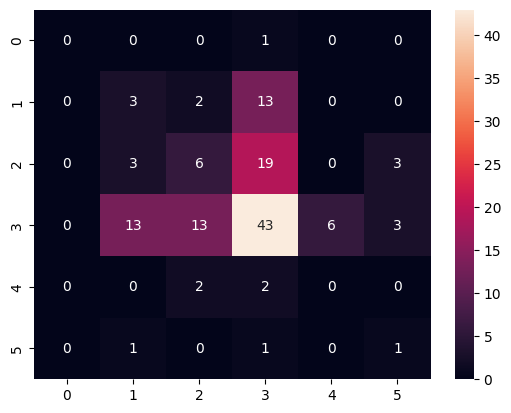

In [23]:
dicisionTreeClassificator(df_test, classe, 5)

In [25]:
rf=RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [26]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.41      0.13      0.20        52
           1       0.66      0.90      0.76        97

    accuracy                           0.63       149
   macro avg       0.54      0.52      0.48       149
weighted avg       0.57      0.63      0.57       149

Confusion Report
[[ 7 45]
 [10 87]]


In [36]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy'],
#   verbose=5,
    task_type="GPU"
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
)

/home/luan/.local/lib/python3.10/site-packages/catboost/core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
Default metric period is 5 because AUC is/are not implemented for GPU


0:	learn: 0.6576001	test: 0.6797671	best: 0.6797671 (0)	total: 346ms	remaining: 3.12s
1:	total: 724ms	remaining: 2.9s
2:	total: 1.09s	remaining: 2.55s
3:	total: 1.45s	remaining: 2.17s
4:	total: 1.81s	remaining: 1.81s
5:	learn: 0.4923184	test: 0.6601941	best: 0.6601941 (5)	total: 2.21s	remaining: 1.48s
6:	total: 2.58s	remaining: 1.1s
7:	total: 2.94s	remaining: 735ms
8:	total: 3.27s	remaining: 363ms
9:	learn: 0.4120535	test: 0.6640945	best: 0.6601941 (5)	total: 3.62s	remaining: 0us
bestTest = 0.660194141
bestIteration = 5
Shrink model to first 6 iterations.


In [37]:
pred=clf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.33      0.22      0.27        50
           1       0.66      0.78      0.72        99

    accuracy                           0.59       149
   macro avg       0.50      0.50      0.49       149
weighted avg       0.55      0.59      0.56       149

Confusion Report
[[11 39]
 [22 77]]


In [27]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pred)

0.6308724832214765

In [ ]:
df_externo = dados.merge(externo, how="right")

In [ ]:
df_externo

,LOTE,REPETICAO,SEMENTE,CLASSE,VIGOR,0,1,2,3,4,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,3,1,6,4,1,0.305882,0.258824,0.294118,0.321569,0.258824,...,0.329412,0.345098,0.294118,0.341176,0.352941,0.298039,0.360784,0.349020,0.301961,0.333333
1,3,1,27,5,1,0.364706,0.313725,0.349020,0.313725,0.254902,...,0.388235,0.392157,0.333333,0.400000,0.356863,0.290196,0.368627,0.360784,0.290196,0.384314
2,3,1,41,3,0,0.356863,0.313725,0.427451,0.352941,0.313725,...,0.529412,0.301961,0.247059,0.372549,0.337255,0.270588,0.337255,0.317647,0.250980,0.309804
3,3,1,35,4,1,0.313725,0.266667,0.572549,0.290196,0.250980,...,0.329412,0.313725,0.266667,0.345098,0.313725,0.286275,0.372549,0.262745,0.258824,0.368627
4,3,1,38,3,0,0.349020,0.294118,0.301961,0.317647,0.278431,...,0.349020,0.345098,0.301961,0.368627,0.333333,0.294118,0.356863,0.333333,0.294118,0.356863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,8,1,50,3,0,0.258824,0.223529,0.301961,0.274510,0.239216,...,0.572549,0.274510,0.258824,0.592157,0.294118,0.274510,0.635294,0.258824,0.239216,0.607843
396,8,1,19,4,1,0.301961,0.266667,0.345098,0.341176,0.309804,...,0.525490,0.247059,0.227451,0.498039,0.298039,0.278431,0.560784,0.282353,0.254902,0.568627
397,8,1,5,4,1,0.282353,0.282353,0.650980,0.294118,0.278431,...,0.635294,0.262745,0.258824,0.654902,0.254902,0.254902,0.650980,0.203922,0.211765,0.607843
398,8,1,46,4,1,0.258824,0.250980,0.639216,0.239216,0.227451,...,0.349020,0.364706,0.298039,0.349020,0.278431,0.227451,0.278431,0.305882,0.258824,0.427451


<AxesSubplot: >

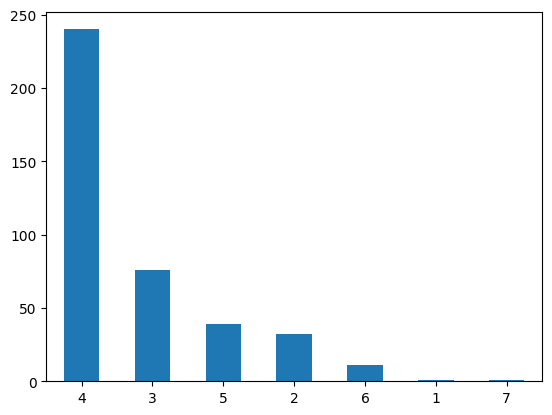

In [ ]:
df_externo['CLASSE'].value_counts().plot.bar(rot=0)

<AxesSubplot: >

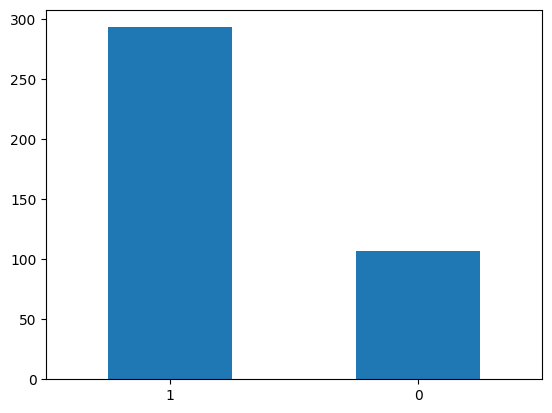

In [ ]:
df_externo['VIGOR'].value_counts().plot.bar(rot=0)